In [ ]:
Install Dependancies

In [2]:
pip install tensorflow opencv-python mediapipe scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


Imports Dependencies

In [67]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import json
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.callbacks import TensorBoard

Setup folders for collection

In [2]:
def get_directories(path):
    return [d for d in os.listdir(path) if os.path.isdir(os.path.join(path, d))]

In [3]:

PROJECT_PATH="/mnt/Projects/Studies/projects/Class/Final"
gestures = np.array(get_directories(f"{PROJECT_PATH}/gesture/"))
print(gestures)


['grab' 'stretch' 'swipe-down' 'swipe-left' 'swipe-right']


In [5]:
def read_json(path):
    with open(path, 'r') as file:
        return json.load(file)

In [6]:
gesture_list=read_json(f"{PROJECT_PATH}/config/gesture.json")
gestures=np.array(gesture_list)
print(gesture_list)

['swipe-right', 'swipe-left', 'stretch', 'swipe-down', 'grab']


In [12]:

def get_data(path):
    #print(path)
    data=read_json(path)  
    ar=[]
    for i in range(24):
        d=data[i]
        ar.append(np.array(d))
    return np.array(ar)


In [8]:
def get_file_list(path):
    return os.listdir(path)

In [13]:
features,labels=[],[]
for gesture in gestures:
    gesture_path=f"{PROJECT_PATH}/gesture/{gesture}"
    list=get_file_list(gesture_path)
    #print(list)
    for file in list:
        cd=get_data(f"{gesture_path}/{file}")
        if cd is not None:
            features.append(cd)
            labels.append(gesture)
features=np.array(features)

In [14]:
print(features.shape)


(151, 24, 126)


In [15]:
labels

['swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-right',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'swipe-left',
 'stretch',
 'stretch',
 'stretch',
 'stretch',
 'stret

In [16]:
np.array(features)[0]

array([[ 0.        ,  0.        ,  0.        , ...,  0.83733767,
         0.28695962, -0.0160951 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.83713847,
         0.28682205, -0.01816973],
       [ 0.        ,  0.        ,  0.        , ...,  0.83583772,
         0.28647894, -0.01257053],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.44845214,
         0.27573317, -0.02922808],
       [ 0.        ,  0.        ,  0.        , ...,  0.44442374,
         0.27517408, -0.02669681],
       [ 0.        ,  0.        ,  0.        , ...,  0.43344864,
         0.27697465, -0.02600858]])

In [17]:
len(features)

151

In [18]:
len(labels)

151

In [19]:
int_labels=[]
for gesture in labels:
    try:
        int_labels.append(gesture_list.index(gesture))
    except:
        print(f"{gesture} is not in list")
int_labels=np.array(int_labels)
print(int_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4]


In [20]:
y=to_categorical(int_labels).astype(int)

In [21]:
y.shape

(151, 5)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.2)

In [23]:
x_train.shape

(120, 24, 126)

In [24]:
y_train.shape

(120, 5)

In [25]:
x_test.shape,y_test.shape

((31, 24, 126), (31, 5))

In [27]:
model = Sequential()
# RNN layer
model.add(LSTM(units = 128, input_shape = (x_train.shape[1], x_train.shape[2])))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-10-15 17:54:48.290660: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-15 17:54:48.344649: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [28]:
print(y_train.shape[1])
print(gestures.shape[0])

5
5


In [29]:
x_train.shape[2]

126

In [30]:
history=model.fit(x_train,y_train,epochs=500,batch_size=36,verbose=1)

Epoch 1/500
4/4 [==============================] - 4s 31ms/step - loss: 1.5400 - accuracy: 0.3417
Epoch 2/500
4/4 [==============================] - 0s 34ms/step - loss: 1.2167 - accuracy: 0.6000
Epoch 3/500
4/4 [==============================] - 0s 52ms/step - loss: 1.0346 - accuracy: 0.5667
Epoch 4/500
4/4 [==============================] - 0s 35ms/step - loss: 0.8841 - accuracy: 0.6167
Epoch 5/500
4/4 [==============================] - 0s 32ms/step - loss: 0.7645 - accuracy: 0.6833
Epoch 6/500
4/4 [==============================] - 0s 43ms/step - loss: 0.6532 - accuracy: 0.7333
Epoch 7/500
4/4 [==============================] - 0s 47ms/step - loss: 0.5608 - accuracy: 0.8250
Epoch 8/500
4/4 [==============================] - 0s 44ms/step - loss: 0.4885 - accuracy: 0.8833
Epoch 9/500
4/4 [==============================] - 0s 36ms/step - loss: 0.4060 - accuracy: 0.9167
Epoch 10/500
4/4 [==============================] - 0s 46ms/step - loss: 0.2693 - accuracy: 0.9583
Epoch 11/500
4/4 [=

In [31]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

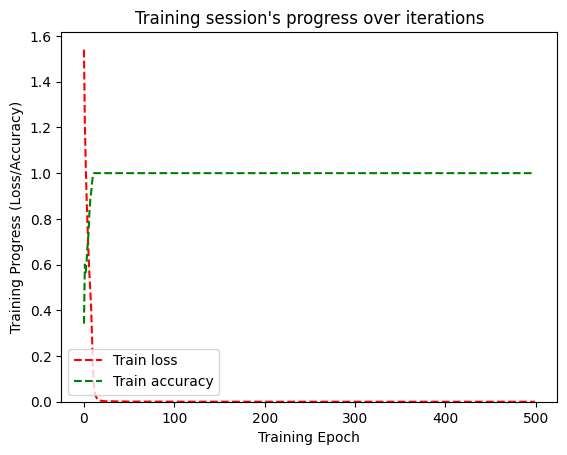

In [32]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
#plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
#plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0) 
plt.show()

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               130560    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 139141 (543.52 KB)
Trainable params: 139141 (543.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Predict

In [63]:
dtest=np.array(read_json(f"{PROJECT_PATH}/dtest/dtest.json"))


In [66]:
gesture_list[np.argmax(model.predict(dtest))]

1/1 [==============================] - 0s 36ms/step


'swipe-down'

In [34]:
res=model.predict(x_test)

1/1 [==============================] - 1s 636ms/step


In [35]:
len(res)

31

In [36]:
np.argmax(res)

136

In [37]:
np.sum(res[1])

1.0

In [38]:
res

array([[9.2322708e-08, 4.4259480e-07, 5.5573892e-09, 1.9454255e-06,
        9.9999744e-01],
       [1.7009432e-07, 2.0483155e-07, 8.4983509e-07, 9.9999839e-01,
        4.0074210e-07],
       [2.9509732e-07, 5.3766718e-07, 9.9999851e-01, 5.4683102e-07,
        4.5627235e-08],
       [3.0089404e-07, 5.5363046e-07, 9.9999851e-01, 5.5433946e-07,
        4.6660276e-08],
       [3.7780774e-07, 9.9999899e-01, 3.4050385e-07, 2.3616677e-08,
        1.7918308e-07],
       [9.9999851e-01, 6.3600868e-07, 5.5188934e-07, 3.7087393e-08,
        2.0967401e-07],
       [2.9993390e-07, 9.9999911e-01, 3.2665810e-07, 2.3101169e-08,
        1.5976426e-07],
       [9.4894837e-08, 4.6972971e-07, 5.1132374e-09, 1.8373394e-06,
        9.9999756e-01],
       [4.0803954e-07, 9.9999899e-01, 3.6297536e-07, 2.7132229e-08,
        2.0739583e-07],
       [9.9999839e-01, 6.9201496e-07, 5.6121729e-07, 4.0324917e-08,
        2.2585102e-07],
       [2.9715892e-07, 5.1343773e-07, 9.9999863e-01, 5.0622151e-07,
        3.76

In [39]:
gesture_list[np.argmax(res[1])]

'swipe-down'

In [40]:
gestures[np.argmax(y_test[1])]

'swipe-down'

In [41]:
gestures[np.argmax(res[0])]

'grab'

In [42]:
gestures[np.argmax(y_test[0])]

'grab'

Save weights


In [44]:
model.save('gesture_model.h5')

Model Evaluation

In [45]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [46]:
ypred=model.predict(x_test)

1/1 [==============================] - 0s 56ms/step


In [47]:
ypred[0]

array([9.2322708e-08, 4.4259480e-07, 5.5573892e-09, 1.9454255e-06,
       9.9999744e-01], dtype=float32)

In [48]:
ytrue=np.argmax(y_test,axis=1).tolist()
ypred=np.argmax(ypred,axis=1).tolist()

In [49]:
actual=np.array(ytrue)
predictions=np.array(ypred)
result = np.column_stack((actual, predictions))
print(result)

[[4 4]
 [3 3]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [1 1]
 [4 4]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [4 4]
 [3 3]
 [1 1]
 [0 0]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [4 4]
 [0 0]
 [0 0]
 [3 3]
 [1 1]
 [0 0]
 [3 3]
 [4 4]]


In [51]:
multilabel_confusion_matrix(ytrue,ypred)

array([[[22,  0],
        [ 0,  9]],

       [[26,  0],
        [ 0,  5]],

       [[24,  0],
        [ 0,  7]],

       [[27,  0],
        [ 0,  4]],

       [[25,  0],
        [ 0,  6]]])

In [164]:
res=model.predict([tt])
print(res[0])


NameError: name 'tt' is not defined

In [52]:
accuracy_score(ytrue,ypred)

1.0

In [53]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 1)
print("Test Accuracy :", accuracy)
print("Test Loss :", loss)

1/1 [==============================] - 1s 748ms/step - loss: 1.5536e-06 - accuracy: 1.0000
Test Accuracy : 1.0
Test Loss : 1.5535648572040373e-06


1/1 [==============================] - 0s 29ms/step


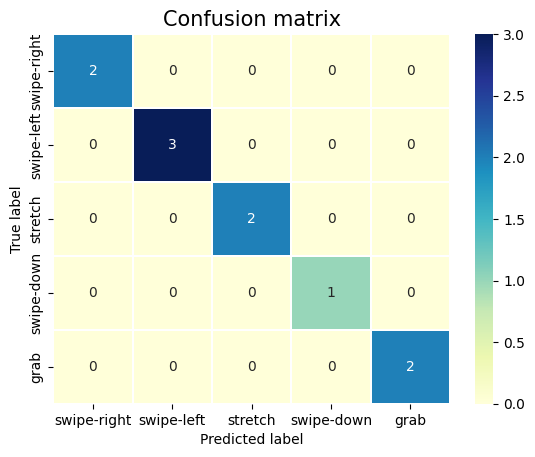

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(x_test[0:10])
max_test = np.argmax(y_test[0:10], axis=1)
max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = confusion_matrix(max_test, max_predictions)
sns.heatmap(confusion_matrix, xticklabels = gestures[0:10], yticklabels = gestures[0:10], annot = True, linewidths = 0.1, fmt='d', cmap = 'YlGnBu')
plt.title("Confusion matrix", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()